- import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import gridspec
from PIL import Image

- import dataset

In [76]:
train_csv = pd.read_csv('Dataset/train.csv')
print(f"There are {len(train_csv.species.unique())} species in the train set.")
print(f"There are {len(train_csv.id.unique())} images in the train set.")
print(f"There are {train_csv.shape[1]} columns in the train set.")
print(f"There are {train_csv.isnull().sum().sum()} missing values in the train set.")
train_csv.describe()

There are 99 species in the train set.
There are 990 images in the train set.
There are 194 columns in the train set.
There are 0 missing values in the train set.


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [77]:
test_csv = pd.read_csv('Dataset/test.csv')
print(f"There are {len(test_csv.id.unique())} images in the test set.")
print(f"There are {len(test_csv.id.unique())} images in the train set.")
print(f"There are {test_csv.shape[1]} columns in the test set.")
print(f"There are {test_csv.isnull().sum().sum()} missing values in the test set.")
test_csv.describe()

There are 594 images in the test set.
There are 594 images in the train set.
There are 193 columns in the test set.
There are 0 missing values in the test set.


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


- View Sample of images

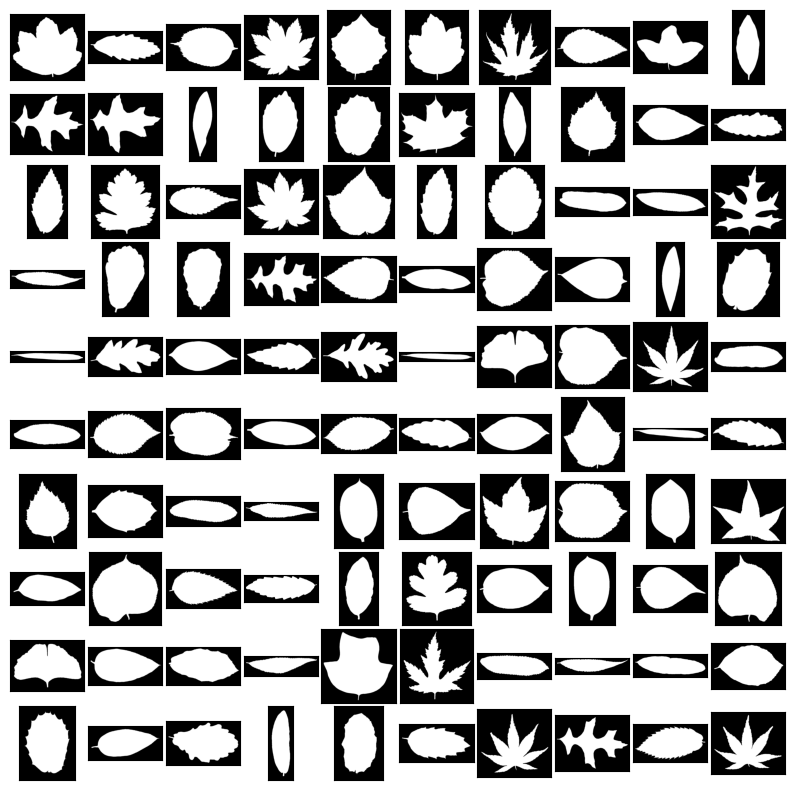

In [8]:
image_folder = "Dataset/images/"
image_filenames = sorted(os.listdir(image_folder))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(10, 10, wspace=0.05, hspace=0.05)

for i, image_filename in enumerate(image_filenames[:100]):
    image_path = os.path.join(image_folder, image_filename)
    
    img = Image.open(image_path).convert('1')
    
    ax = plt.subplot(gs[i])
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.imshow(img)

plt.show()

# Correlation Analysis

- Correlation between margin features

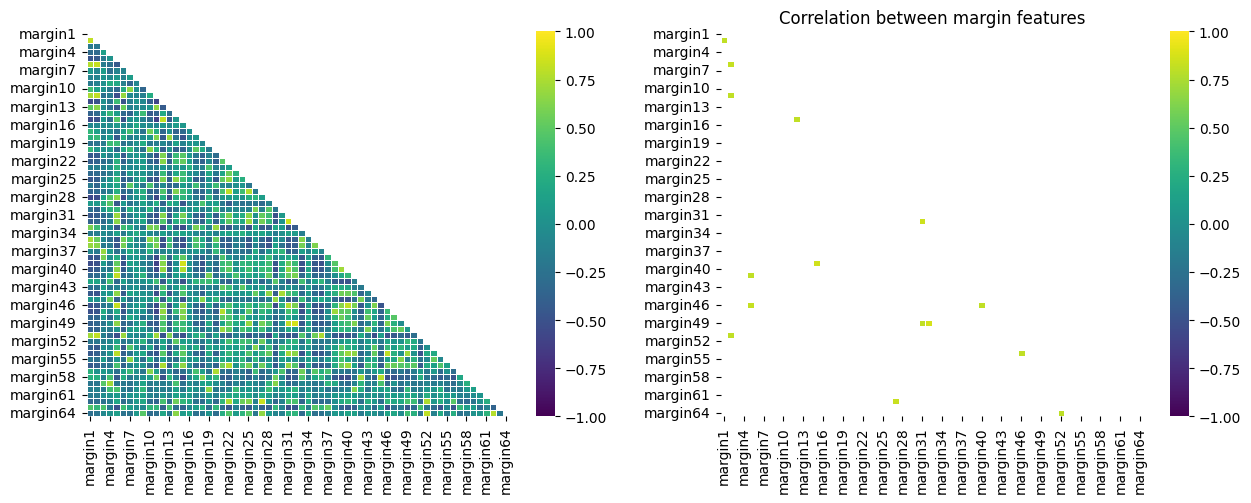

There are 64 MARGIN features in the train set.
margin1 and margin2 have high correlation = 0.81
margin2 and margin6 have high correlation = 0.83
margin2 and margin11 have high correlation = 0.81
margin2 and margin51 have high correlation = 0.81
margin5 and margin41 have high correlation = 0.81
margin5 and margin46 have high correlation = 0.83
margin12 and margin15 have high correlation = 0.81
margin15 and margin39 have high correlation = 0.85
margin27 and margin62 have high correlation = 0.83
margin31 and margin32 have high correlation = 0.85
margin31 and margin49 have high correlation = 0.81
margin32 and margin49 have high correlation = 0.87
margin40 and margin46 have high correlation = 0.81
margin46 and margin54 have high correlation = 0.81
margin52 and margin64 have high correlation = 0.8


In [73]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
margin_corr = train_csv.filter(regex='margin').corr()
sns.heatmap(margin_corr,vmin=-1, vmax=1, center=0, cmap='viridis', mask=np.triu(np.ones_like(margin_corr,dtype=bool)), linewidths=0.5, ax=ax[0])
sns.heatmap(margin_corr,vmin=-1, vmax=1, center=0, cmap='viridis', mask= np.triu(np.ones_like(margin_corr, dtype=bool))|(np.abs(margin_corr) <= 0.8)  , linewidths=0.5, ax=ax[1])
plt.title('Correlation between margin features')
plt.show()
print(f"There are {train_csv.filter(regex='margin').shape[1]} MARGIN features in the train set.")
for i in range(len(margin_corr)):
    for j in range(i+1,len(margin_corr)):
        if i != j and abs(margin_corr.iloc[i,j]) >= 0.8:
            print(f"{margin_corr.columns[i]} and {margin_corr.columns[j]} have high correlation = {round(margin_corr.iloc[i,j],2)}")

- Correlation between Shape features

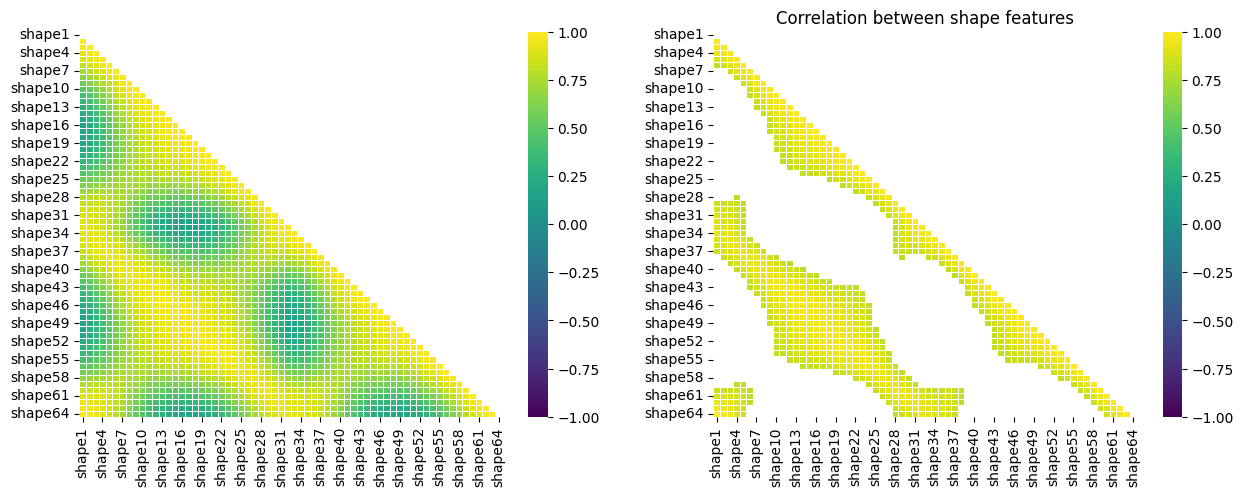

There are 64 SHAPE features in the train set.
shape1 and shape2 have high correlation = 0.99
shape1 and shape3 have high correlation = 0.96
shape1 and shape4 have high correlation = 0.93
shape1 and shape5 have high correlation = 0.88
shape1 and shape6 have high correlation = 0.81
shape1 and shape29 have high correlation = 0.83
shape1 and shape30 have high correlation = 0.87
shape1 and shape31 have high correlation = 0.89
shape1 and shape32 have high correlation = 0.9
shape1 and shape33 have high correlation = 0.91
shape1 and shape34 have high correlation = 0.91
shape1 and shape35 have high correlation = 0.9
shape1 and shape36 have high correlation = 0.88
shape1 and shape37 have high correlation = 0.84
shape1 and shape60 have high correlation = 0.84
shape1 and shape61 have high correlation = 0.9
shape1 and shape62 have high correlation = 0.94
shape1 and shape63 have high correlation = 0.97
shape1 and shape64 have high correlation = 0.99
shape2 and shape3 have high correlation = 0.99
sha

In [74]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
shape_corr = train_csv.filter(regex='shape').corr()
sns.heatmap(shape_corr,vmin=-1, vmax=1, center=0, cmap='viridis', mask=np.triu(np.ones_like(shape_corr,dtype=bool)), linewidths=0.5, ax=ax[0])
sns.heatmap(shape_corr,vmin=-1, vmax=1, center=0, cmap='viridis', mask= np.triu(np.ones_like(shape_corr, dtype=bool))|(np.abs(shape_corr) <= 0.8)  , linewidths=0.5, ax=ax[1])
plt.title('Correlation between shape features')
plt.show()
print(f"There are {train_csv.filter(regex='shape').shape[1]} SHAPE features in the train set.")
for i in range(len(shape_corr)):
    for j in range(i+1,len(shape_corr)):
        if i != j and abs(shape_corr.iloc[i,j]) >= 0.8:
            print(f"{shape_corr.columns[i]} and {shape_corr.columns[j]} have high correlation = {round(shape_corr.iloc[i,j],2)}")

- Correlation between Texture features

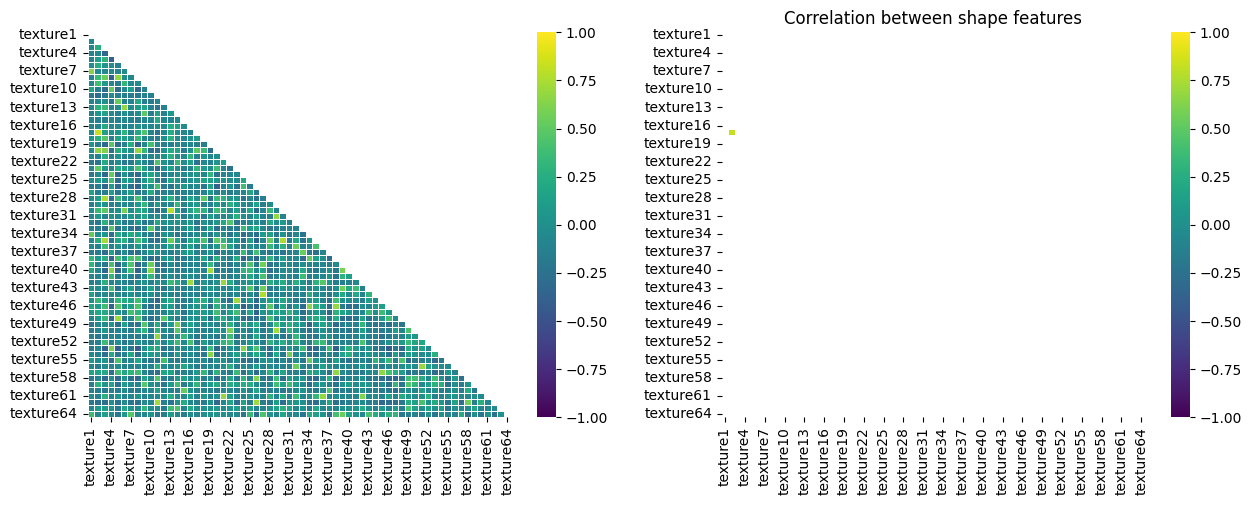

There are 64 TEXTURE features in the train set.
texture2 and texture17 have high correlation = 0.82


In [75]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
texture_corr = train_csv.filter(regex='texture').corr()
sns.heatmap(texture_corr,vmin=-1, vmax=1, center=0, cmap='viridis', mask=np.triu(np.ones_like(texture_corr,dtype=bool)), linewidths=0.5, ax=ax[0])
sns.heatmap(texture_corr,vmin=-1, vmax=1, center=0, cmap='viridis', mask= np.triu(np.ones_like(texture_corr, dtype=bool))|(np.abs(texture_corr) <= 0.8)  , linewidths=0.5, ax=ax[1])
plt.title('Correlation between shape features')
plt.show()
print(f"There are {train_csv.filter(regex='texture').shape[1]} TEXTURE features in the train set.")
for i in range(len(texture_corr)):
    for j in range(i+1,len(texture_corr)):
        if i != j and abs(texture_corr.iloc[i,j]) >= 0.8:
            print(f"{texture_corr.columns[i]} and {texture_corr.columns[j]} have high correlation = {round(texture_corr.iloc[i,j],2)}")

In [72]:
corr = train_csv.drop(['id','species'],axis=1).corr()
for i in range(len(corr)):
    for j in range(i+1,len(corr)):
        if  i != j and abs(corr.iloc[i,j]) >= 0.8:
            print(f"{corr.columns[i]} and {corr.columns[j]} have high correlation = {round(corr.iloc[i,j],2)}")

margin1 and margin2 have high correlation = 0.81
margin2 and margin6 have high correlation = 0.83
margin2 and margin11 have high correlation = 0.81
margin2 and margin51 have high correlation = 0.81
margin5 and margin41 have high correlation = 0.81
margin5 and margin46 have high correlation = 0.83
margin12 and margin15 have high correlation = 0.81
margin15 and margin39 have high correlation = 0.85
margin27 and margin62 have high correlation = 0.83
margin31 and margin32 have high correlation = 0.85
margin31 and margin49 have high correlation = 0.81
margin32 and margin49 have high correlation = 0.87
margin40 and margin46 have high correlation = 0.81
margin46 and margin54 have high correlation = 0.81
margin52 and margin64 have high correlation = 0.8
shape1 and shape2 have high correlation = 0.99
shape1 and shape3 have high correlation = 0.96
shape1 and shape4 have high correlation = 0.93
shape1 and shape5 have high correlation = 0.88
shape1 and shape6 have high correlation = 0.81
shape1 an